In [111]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

In [112]:
df=pd.read_csv('/content/spam (1).csv', encoding='latin')

In [113]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [114]:
df.shape

(5572, 5)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [116]:
df=df[['v1', 'v2']]

df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [117]:
new_columns = {'v1': 'Label', 'v2': 'Message'}
df.rename(columns=new_columns, inplace=True)

In [118]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='Label', ylabel='count'>

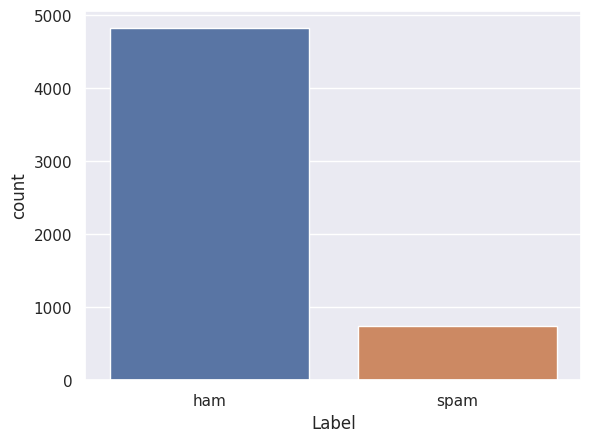

In [119]:
sn.set()

sn.countplot(x=df['Label'])

### Preprocessing: Convert labels to binary (0 for ham, 1 for spam)

In [121]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [122]:
df['Label']=lb.fit_transform(df['Label'])

In [123]:
df.head(2)

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [124]:
df.isnull().sum()

Label      0
Message    0
dtype: int64

In [125]:
df.duplicated().sum()

403

In [126]:
df.drop_duplicates()

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### Train Test Split

In [127]:
X=df['Message']
Y=df['Label']

In [128]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [129]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Label, Length: 5572, dtype: int64


In [130]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

 ### Feature extraction using TF-IDF

In [ ]:
# We are using here Tfidf but CountidfVectorizer gives more accuracy

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

X_train=tfidf.fit_transform(X_train)
X_test=tfidf.transform(X_test)

In [132]:
print(X_train)

  (0, 6829)	0.35592363843476604
  (0, 6786)	0.2367070527638414
  (0, 5436)	0.4142461999440772
  (0, 4812)	0.18509260851702522
  (0, 4136)	0.3298127240840384
  (0, 6271)	0.46131758511110094
  (0, 1259)	0.20991001996823538
  (0, 7389)	0.2087195163846968
  (0, 7285)	0.21195270256812157
  (0, 5344)	0.33723102160133134
  (0, 4715)	0.2087195163846968
  (1, 2172)	0.3430903999389161
  (1, 1469)	0.5784568996273233
  (1, 7577)	0.22757599943251927
  (1, 7093)	0.4015885612154987
  (1, 3239)	0.5784568996273233
  (2, 3683)	0.36147927555488757
  (2, 6174)	0.1589430540413082
  (2, 902)	0.22990586649271288
  (2, 6088)	0.39273592520362793
  (2, 4592)	0.14484764678724146
  (2, 4505)	0.22312906886459677
  (2, 1571)	0.16154284096802926
  (2, 4268)	0.39273592520362793
  (2, 2935)	0.30187626428947445
  :	:
  (4453, 6819)	0.09121202230881977
  (4453, 1277)	0.1961204094309836
  (4453, 3299)	0.1411015311094159
  (4454, 3551)	0.3904653449703421
  (4454, 4838)	0.5365333913141752
  (4454, 5909)	0.2957092973435236


In [133]:
print(X_test)

  (0, 7350)	0.17869477602945302
  (0, 6738)	0.17207284522188568
  (0, 6727)	0.24693334613034687
  (0, 4862)	0.2041477228476921
  (0, 4855)	0.34658667048223823
  (0, 4750)	0.15879766783157062
  (0, 4592)	0.1428567215054584
  (0, 3702)	0.37642540882477754
  (0, 3537)	0.1670892039362005
  (0, 3286)	0.21804027481763705
  (0, 2556)	0.26689995854355214
  (0, 2359)	0.27326422556779184
  (0, 2160)	0.1913533501480653
  (0, 1679)	0.35651075694581447
  (0, 1186)	0.26840769617745364
  (0, 964)	0.26689995854355214
  (1, 7331)	0.19181732842167626
  (1, 7285)	0.2646136734460063
  (1, 7262)	0.14858003674589892
  (1, 6727)	0.1925474356160349
  (1, 6700)	0.278549419604722
  (1, 6695)	0.11837591597363992
  (1, 5639)	0.28796740815856187
  (1, 5598)	0.2158548483558977
  (1, 5344)	0.21050908609480307
  :	:
  (1112, 4860)	0.47301684505967295
  (1112, 4331)	0.2317741197457511
  (1112, 2946)	0.3142473990502616
  (1112, 2900)	0.2384689279409454
  (1112, 1603)	0.2483277566472644
  (1112, 913)	0.31802700324464117

## Model training

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix

### 1.Logistic Regression

In [135]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

Training Accuracy

In [136]:
y_pred=model.predict(X_train)
train_acc=accuracy_score(Y_train, y_pred)

train_acc

0.9782364819385236

Testing Accuracy

In [137]:
y1_pred=model.predict(X_test)
test_acc=accuracy_score(Y_test, y1_pred)

test_acc

0.9650224215246637

Confusion Matrix

In [152]:
y2_pred=model.predict(X_test)
conf1=confusion_matrix(Y_test, y2_pred)

conf1

array([[957,   0],
       [ 39, 119]])

### 2. Naive Bayes

In [138]:
bayes=MultinomialNB()
bayes.fit(X_train,Y_train)

MultinomialNB()

Training Accuracy

In [139]:
z_pred=bayes.predict(X_train)
trainn_acc=accuracy_score(Y_train, z_pred)

trainn_acc

0.9730760601301324

Testing Accuracy

In [140]:
z1_pred=bayes.predict(X_test)
testt_acc=accuracy_score(Y_test, z1_pred)

testt_acc

0.9461883408071748

Confusion Matrix

In [154]:
z2_pred=bayes.predict(X_test)
conf2=confusion_matrix(Y_test, z2_pred)

conf2

array([[957,   0],
       [ 60,  98]])

### 3. SVM

In [141]:
sm=SVC()
sm.fit(X_train,Y_train)

SVC()

Training Accuracy

In [142]:
x_pred=sm.predict(X_train)
trainnn_acc=accuracy_score(Y_train, x_pred)

trainnn_acc

0.9982050706753421

Testing Accuracy

In [143]:
x1_pred=sm.predict(X_test)
testtt_acc=accuracy_score(Y_test, x1_pred)

testtt_acc

0.9721973094170404

Confusion Matrix

In [155]:
x2_pred=sm.predict(X_test)
conf3=confusion_matrix(Y_test, x2_pred)

conf3

array([[957,   0],
       [ 31, 127]])

**So we are choosing here Logistic Regression**

## Prediction

**For Ham**

In [146]:
input1 =''' Hi, I am a student of Charusat University. I am writing this mail to inform you that I have been selected for the internship at Google. I am very excited to work with you.'''

print(input1)
input = tfidf.transform([input1])
print(lb.inverse_transform(model.predict(input)))

 Hi, I am a student of Charusat University. I am writing this mail to inform you that I have been selected for the internship at Google. I am very excited to work with you.
['ham']


**For spam**

In [148]:
input2 = '''You have won a lottery of 1 million dollars. Please send your bank details to claim the prize.'''

print(input2)
input = tfidf.transform([input2])
print(lb.inverse_transform(model.predict(input)))

You have won a lottery of 1 million dollars. Please send your bank details to claim the prize.
['spam']
